In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22.0,male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female
2,"Heikkinen, Miss. Laina",26.0,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female
4,"Allen, Mr. William Henry",35.0,male


In [4]:
df.isnull().sum()

Name      0
Age     177
Sex      13
dtype: int64

In [5]:
print(df.shape)
print(df.shape)

(891, 3)
(891, 3)


In [6]:
df.Age.fillna(int(df.Age.mean()))

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    29.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [7]:
int(df.Age.mean())

29

In [8]:
mean = df.Age.mean()
std = df.Age.std()
num = df.Age.isnull().sum()

In [9]:
rand = np.random.randint(mean-std, mean+std, size=num )
rand

array([31, 21, 18, 36, 26, 36, 19, 25, 43, 16, 30, 38, 33, 30, 27, 38, 20,
       28, 19, 30, 41, 38, 23, 39, 18, 22, 23, 27, 19, 41, 22, 15, 41, 24,
       24, 17, 33, 33, 25, 30, 22, 40, 27, 16, 36, 36, 15, 15, 28, 27, 27,
       16, 28, 42, 18, 42, 38, 37, 37, 15, 25, 15, 17, 34, 29, 19, 32, 20,
       21, 32, 40, 39, 37, 40, 30, 35, 33, 23, 29, 22, 22, 24, 42, 27, 18,
       39, 36, 34, 41, 25, 25, 23, 28, 20, 17, 32, 29, 36, 26, 36, 43, 23,
       15, 26, 34, 40, 42, 40, 34, 38, 23, 30, 40, 22, 24, 16, 20, 18, 23,
       15, 42, 19, 15, 31, 37, 25, 15, 21, 23, 27, 33, 39, 37, 34, 33, 37,
       29, 42, 35, 23, 24, 24, 32, 16, 26, 15, 30, 27, 16, 23, 37, 30, 39,
       35, 24, 33, 20, 33, 30, 17, 18, 32, 24, 32, 23, 40, 21, 43, 27, 18,
       36, 38, 15, 28, 27, 29, 23])

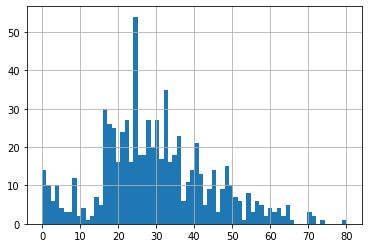

In [10]:
df['Age'].dropna().astype(int).hist(bins = 70)

In [11]:
df['Age'][df['Age'].isnull()] = rand 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df['Age'].isnull().sum()

0

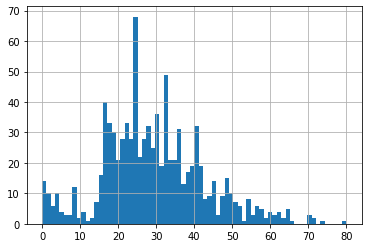

In [13]:
df['Age'].astype(int).hist(bins = 70)

In [14]:
df[['Sex']].head()

,Sex
0,male
1,female
2,NaN
3,female
4,male


In [16]:
#前の値で埋める
#df[['Sex']].fillna(method='ffill')

,Sex
0,male
1,female
2,female
3,female
4,male
5,male
6,male
7,male
8,female
9,female


In [18]:
pd.get_dummies(df['Sex']).drop('male', axis = 1)

,female
0,0
1,1
2,0
3,1
4,0
5,0
6,0
7,0
8,1
9,0


In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
mmscaler = MinMaxScaler(copy = True)

In [22]:
lim_min , lim_max = df['Age'].min() ,df['Age'].max() 

In [24]:
lim_min, lim_max

(0.42, 80.0)

In [25]:
np.array([lim_min, lim_max]).reshape(-1,1)
mmscaler.fit(np.array([lim_min, lim_max]).reshape(-1,1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [26]:
mmscaler.transform(df[['Age']])

array([[0.27117366],
       [0.4722292 ],
       [0.32143755],
       [0.43453129],
       [0.43453129],
       [0.3842674 ],
       [0.67328474],
       [0.01985423],
       [0.33400352],
       [0.17064589],
       [0.04498618],
       [0.72354863],
       [0.24604172],
       [0.48479517],
       [0.17064589],
       [0.68585072],
       [0.01985423],
       [0.25860769],
       [0.3842674 ],
       [0.22090978],
       [0.43453129],
       [0.42196532],
       [0.18321186],
       [0.34656949],
       [0.09525006],
       [0.4722292 ],
       [0.44709726],
       [0.23347575],
       [0.32143755],
       [0.44709726],
       [0.49736115],
       [0.23347575],
       [0.30887158],
       [0.8240764 ],
       [0.34656949],
       [0.52249309],
       [0.53505906],
       [0.25860769],
       [0.22090978],
       [0.17064589],
       [0.49736115],
       [0.33400352],
       [0.19577783],
       [0.03242021],
       [0.23347575],
       [0.37170143],
       [0.4722292 ],
       [0.409

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
ss = StandardScaler()

In [31]:
ss.fit_transform(df[['Age']]).std()

1.0

In [32]:
df_wine = pd.read_csv('wine.csv')

In [33]:
df_wine.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [35]:
_dfs = ss.fit_transform(df_wine.iloc[:, 1:])

In [36]:
_dfs

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [40]:
dfs = pd.DataFrame(_dfs, columns=df_wine.columns[1:])

In [41]:
dfs.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [42]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA()
pca.fit(dfs)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [46]:
feature = pca.transform(dfs)

In [53]:
feature = pd.DataFrame(feature, columns=['PC{}'.format(x+1) for x in range(len(dfs.columns))])
feature.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


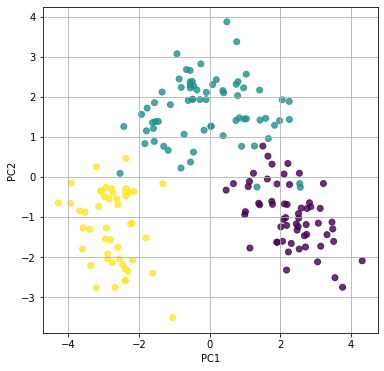

In [54]:
plt.figure(figsize=(6,6))
plt.scatter(feature['PC1'],feature['PC2'], alpha = 0.8, c=df_wine['class'])
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [55]:
from sklearn.model_selection import train_test_split

In [57]:
X = feature.iloc[:, :2]

In [59]:
y = df_wine.iloc[:, 0]

In [61]:
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=3)

In [62]:
X_train

,PC1,PC2
42,3.070807,-1.155919
67,0.183384,2.427146
31,2.677411,-1.471874
141,-2.286561,-0.372508
5,3.050254,-2.122401
162,-2.847674,-0.556044
88,-1.115111,1.802247
102,-0.161174,1.164483
77,-1.457377,1.383352
12,2.113462,-0.675706


In [63]:
from sklearn.linear_model import LogisticRegression

In [65]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
y_pred = lr.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(y_true = y_test, y_pred= y_pred)

0.9166666666666666